Name:Yasir Farooqui

Tyre Dataset with Early Stopping

In [ ]:
import sys
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import random_split,DataLoader
import matplotlib.pyplot as plt


#preprocessing using ResNEt Pipeline

In [2]:
preprocess=transforms.Compose(
    
    [transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.456],std=[0.229,0.224,0.225]),]
    )

Importing the dataset

In [3]:
dataset=torchvision.datasets.ImageFolder(
    root='D:/DL_LAb/tyre/Digital images of defective and good condition tyres',
    transform=preprocess
)
print(dataset.class_to_idx)
print(dataset[123])

{'defective': 0, 'good': 1}
(tensor([[[-1.5870, -1.5528, -1.5357,  ..., -0.4397, -0.4911, -0.5596],
         [-1.5357, -1.5528, -1.5528,  ..., -0.4739, -0.5253, -0.5767],
         [-1.4843, -1.5528, -1.5528,  ..., -0.5082, -0.4397, -0.4397],
         ...,
         [-0.4739, -0.3027, -0.5253,  ..., -0.1486, -0.1486, -0.2342],
         [-0.4226, -0.1828, -0.2684,  ..., -0.2171, -0.2684, -0.3198],
         [-0.4568, -0.2342, -0.3712,  ..., -0.2856, -0.2513, -0.3198]],

        [[-1.5980, -1.5280, -1.5105,  ..., -0.3901, -0.4426, -0.5126],
         [-1.5280, -1.5280, -1.5280,  ..., -0.4251, -0.4776, -0.5301],
         [-1.4580, -1.5280, -1.5280,  ..., -0.4601, -0.4076, -0.4076],
         ...,
         [-0.4076, -0.2325, -0.4601,  ..., -0.0574, -0.0924, -0.1975],
         [-0.3375, -0.1099, -0.1975,  ..., -0.1275, -0.2150, -0.2850],
         [-0.3550, -0.1625, -0.3200,  ..., -0.1975, -0.1625, -0.2325]],

        [[-1.5909, -1.5386, -1.5212,  ..., -0.4058, -0.4580, -0.5278],
         [-1.521

performing Train /Test Split

In [4]:
train_ds,val_ds=random_split(dataset,[0.8,0.2])
len(train_ds)


1485

Checking shape of datasets in data loaders

In [5]:
train_data_loader=DataLoader(train_ds,batch_size=4,shuffle=True)
test_data_loader=DataLoader(val_ds,batch_size=4,shuffle=False)

for X,y in train_data_loader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([4, 3, 224, 224])
torch.Size([4])


 Setting default device

In [6]:
device=torch.device('cpu')
if torch.cuda.is_available():
    device=torch.device('cuda')
elif torch.backends.mps.is_available():
    device=torch.device('mps')

print(device)

cuda


In [7]:
from torch import nn
ResNet50_model=torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.DEFAULT)

##dropping the last Fully Connected Layer with definition

ResNet50_model.fc=nn.Identity()

##last layer is now overwritten by Identity Layer
for param in ResNet50_model.parameters():
    param.requires_grad=False   ##no tracking of gradient

ResNet50_model=ResNet50_model.to(device)
ResNet50_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

ResNetModel after over-writing last layer with Identity function


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ResNet50_model = ResNet50_model.to(device)

for X, y in train_data_loader:
    X = X.to(device)           # move input to GPU/CPU
    y = y.to(device)           # move target to GPU/CPU
    print(ResNet50_model(X).shape)
    print(y.shape)
    break


torch.Size([4, 2048])
torch.Size([4])


Define Model to 
be fine tuned

In [9]:
fc_model=nn.Sequential(
nn.Linear(2048,1024),
nn.ReLU(),
nn.Linear(1024,1)
)

fc_model=fc_model.to(device)

##model ready for transfer Learning
model=nn.Sequential(
    ResNet50_model,
    fc_model
)

 Checking shape of output of model i.e. model(X)

In [10]:
for X,y in train_data_loader:
    print(model(X.to(device)).shape)
    break

print(y.shape)
print(X.shape)
print(y.dtype)

torch.Size([4, 1])
torch.Size([4])
torch.Size([4, 3, 224, 224])
torch.int64


In [11]:
##defining the Optimizer and Loss Function
optimizer=torch.optim.Adam(fc_model.parameters(),lr=0.001)
loss_fn=nn.BCEWithLogitsLoss()  #suitable for binary/Sigmodal Output



ADDing the Early Stopping Logic in the Training Loop

In [13]:



# -------------------------------
# Training Loop with Early Stopping
# -------------------------------
num_epochs = 50
patience = 5   # stop if no improvement after 5 epochs

best_val_loss = float('inf')
counter = 0

# Store metrics for plotting
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    # ----------------- Training Phase -----------------
    model.train()
    ResNet50_model.eval()   # keep ResNet backbone frozen (if fine-tuning partially)
    
    train_loss_sum, train_acc_sum, train_count = 0, 0, 0
    
    for X, y in train_data_loader:
        X, y = X.to(device), y.to(device).type(torch.float).reshape(-1, 1)

        # Forward pass
        outputs = model(X)
        loss = loss_fn(outputs, y)

        # Backward pass + optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy
        prediction = (torch.sigmoid(outputs) > 0.5)
        acc = (prediction == y).sum().item()
        
        # Track metrics
        train_loss_sum += loss.item()
        train_acc_sum += acc
        train_count += y.size(0)

    avg_train_loss = train_loss_sum / len(train_data_loader)
    avg_train_acc = train_acc_sum / train_count

    # ----------------- Validation Phase -----------------
    model.eval()
    val_loss_sum, val_acc_sum, val_count = 0, 0, 0
    
    with torch.no_grad():
        for X_val, y_val in test_data_loader:
            X_val, y_val = X_val.to(device), y_val.to(device).type(torch.float).reshape(-1, 1)
            
            outputs_val = model(X_val)
            loss_val = loss_fn(outputs_val, y_val)

            prediction_val = (torch.sigmoid(outputs_val) > 0.5)
            acc_val = (prediction_val == y_val).sum().item()

            val_loss_sum += loss_val.item()
            val_acc_sum += acc_val
            val_count += y_val.size(0)

    avg_val_loss = val_loss_sum / len(test_data_loader)
    avg_val_acc = val_acc_sum / val_count

    # ----------------- Store metrics -----------------
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(avg_train_acc)
    val_accuracies.append(avg_val_acc)

    # ----------------- Print Progress -----------------
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}")
    print(f"Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}\n")

    # ----------------- Early Stopping -----------------
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
        torch.save(ResNet50_model.state_dict(), "best_model.pth")  # save best weights
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered!")
            break




Epoch [1/50]
Train Loss: 0.1351, Train Acc: 0.9488
Val Loss: 0.1425, Val Acc: 0.9380

Epoch [2/50]
Train Loss: 0.0586, Train Acc: 0.9771
Val Loss: 0.1179, Val Acc: 0.9542

Epoch [3/50]
Train Loss: 0.0258, Train Acc: 0.9919
Val Loss: 0.1350, Val Acc: 0.9542

Epoch [4/50]
Train Loss: 0.0140, Train Acc: 0.9946
Val Loss: 0.1698, Val Acc: 0.9569

Epoch [5/50]
Train Loss: 0.0062, Train Acc: 0.9973
Val Loss: 0.2111, Val Acc: 0.9461

Epoch [6/50]
Train Loss: 0.0030, Train Acc: 1.0000
Val Loss: 0.2156, Val Acc: 0.9488

Epoch [7/50]
Train Loss: 0.0005, Train Acc: 1.0000
Val Loss: 0.2285, Val Acc: 0.9542

Early stopping triggered!


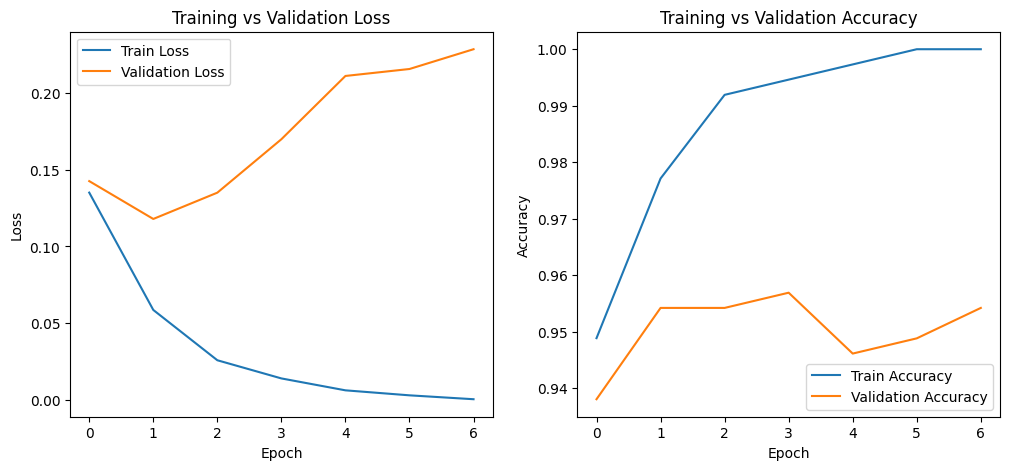

In [14]:
# -------------------------------
# Plot Training & Validation Curves
# -------------------------------
plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.show()